# SMV2rho: Tutorial 6

In this tutorial we will propagate uncertainties through the density conversion scheme.

Let's import the appropriate functions and get started.

In [8]:
# import modules
import numpy as np
from SMV2rho import plotting as smplt
from SMV2rho import density_functions as smd
from SMV2rho import uncertainties as unc
from SMV2rho import constants as c

In [9]:
# import velocity to surface density parameter data
parameters = np.loadtxt("../PARAMETER_FILES/Vp_parameters.dat")
# load parameters for temperature dependence
# T parameters file has following structure...
#   [dVpdT, dVsdT, alpha0, alpha1, K]
T_parameters_all = np.loadtxt("../PARAMETER_FILES/T_parameters.dat")
Vp_T_parameters = T_parameters_all[0], T_parameters_all[2], T_parameters_all[3], T_parameters_all[4]

## Set variables

Note that we don't need a velocity profile file to estimate uncertainties as we use bulk density and the uncertainty parameters are independent of the actual velocity profile.  For the parameter definitions please see Stephenson et al (_in review_).  The poarameters with the prefix `d` represent standard deviations in parameter values.

Uncertainty propagation currently only supports continental geotherms defined by surface and moho heat flux.  Other options for alternative geotherm definitions will be implemented later.


In [10]:
# heatflow parameter values
q0 = 59e-3
qm = 30e-3
hr = 10

# heatflow parameter uncertainties
dq0 = 14e-3
dqm = 10e-3
dhr = 5
ddvdT = 1e-4

# thermal expansion and bulk modulus uncertainties (CRUST)
dalpha0 = 0.5e-5
dalpha1 = 0.5e-8
dK = 20e9

# error in density conversion calculation
dens_conv_err = 0.11

# example crustal thickness and density
tc = 45
rho_c = 2.9

# pack parameter uncertainties into a dictionary
parameter_uncertainties = {
    'dq0': dq0, 'dqm': dqm, 'dhr': dhr, 'ddvdT': ddvdT,
    'dalpha0': dalpha0, 'dalpha1': dalpha1, 'dK': dK}

# pack geotherm parameters
geotherm_parameters = {
    'q0': q0, 'qm': qm, 'hr': hr}

## Outputs and plotting

We can now run the uncertainty propagation with the option `make_plots = True` and inspect the outputs below...

The plots show the mean value of the errors and corrections.

In the first two plots, we are looking at the magnitude of the correction that must be applied to the $\rho_\circ$ value obtained from the pressure-dependent densityb conversion.  This correction accounts for the temperature dependent reduction in $v$ given a range of geothermal gradients, and the uncertainty in the $m$ parameter.  The first panel shows the mean absolute value of the corerection by summing errors in $\rho$.  The second panel shows the mean value of the correction and error by propagating fractional errors in $\rho$.  The second panel is the preferred approach.

The third panel shows uncertainties in geothermal gradient calculated by randomly sampling the parameters defining the geotherm.  Note again that we only currently support one method of calculating the geotherm (see Stephenson et al, _in review_).  This will be improved in later releases.

Other panels show the mean value of corrections applied as a result of compression and thermal expansion and their uncertainties, both by summing errors and by calculating and multiplying fractional uncertainties.

The final panel shows the error in $\rho_\circ$ arising from uncertainty in both the geothermal gradient and the uncertainty in $m$.

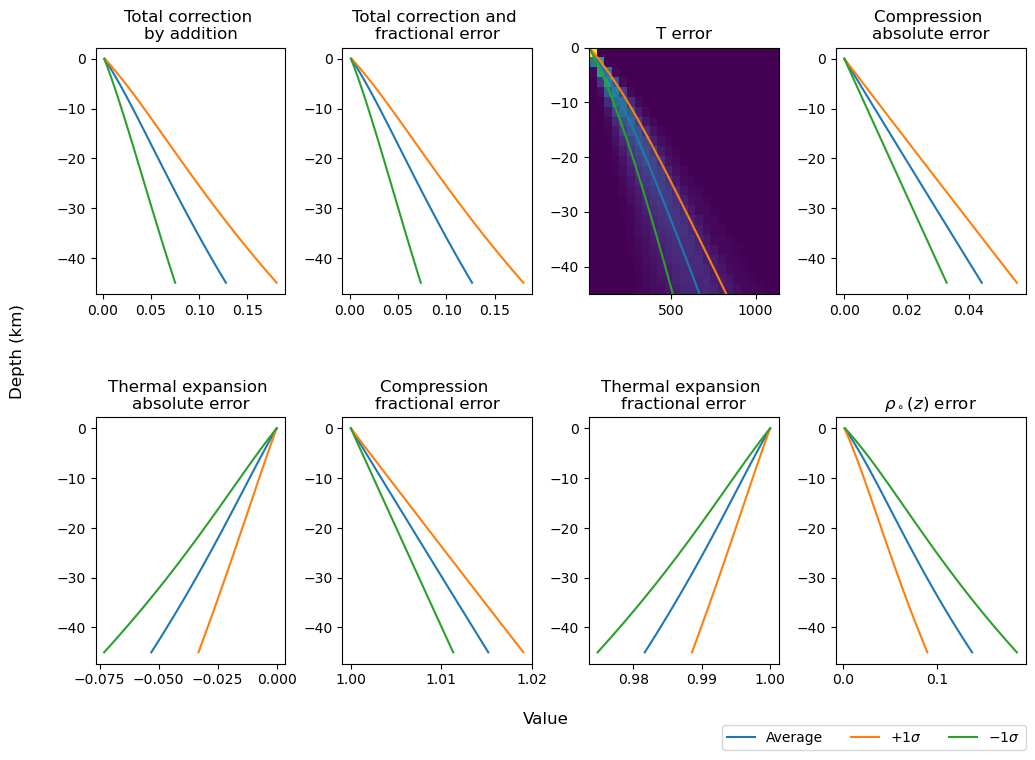

In [11]:
sigma = unc.rho_err(tc, rho_c, parameters, 
            Vp_T_parameters, geotherm_parameters,
            parameter_uncertainties,
            N=1000, z_slices=50, 
            make_plots=True,
            save_plots=False)

## Bulk crustal uncertainty

We can now see the estimate of bulk crustal density uncertainty arising from these uncertainty values.  Again, we can see the error by propagating fractional errors, or by summing errors.  We can see that the result is not hugely different.
Note that we must multiply by the error in the pressure-dependent velocity-to-density conversion in order to see the total uncertainty in density.  The error in velocity-to-density conversion dominates the combined error.

In [24]:
print(f"Absolute bulk density error = {np.sqrt(sigma[0]**2 + dens_conv_err**2)}")

Absolute bulk density error = 0.11402778451118648
